In [303]:
#IMPORT MODULES

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


In [304]:
#CLEAN DATA
df = pd.read_csv("autism_screening.csv")
df.columns = df.columns.str.strip()

drop_cols = ['ethnicity', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation']
df = df.drop(columns=drop_cols) 
df["gender"] = df["gender"].astype(str).str.lower().str.strip()
df["gender"] = df["gender"].map({"f": 0, "m": 1})
df["Class/ASD"] = df["Class/ASD"].map({"NO": 0, "YES": 1})
df["jundice"] = df["jundice"].map({"no": 0, "yes": 1})
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0


In [305]:
#DEFINE INPUTS AND LABELS

data_input = df[["A1_Score", "A2_Score", "A3_Score", "A4_Score", "A5_Score", "A6_Score", "A7_Score", "A8_Score", "A9_Score", "A10_Score", "age", "gender", "jundice"]]
data_labels = df["Class/ASD"]


In [306]:
#SELECT TRAINING AND TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(data_input, data_labels, test_size=0.2, random_state=6)


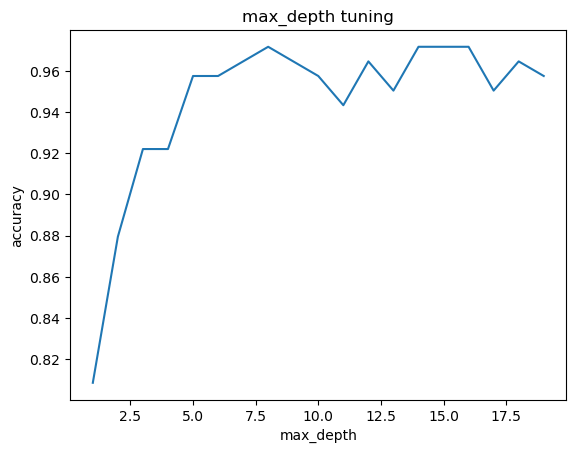

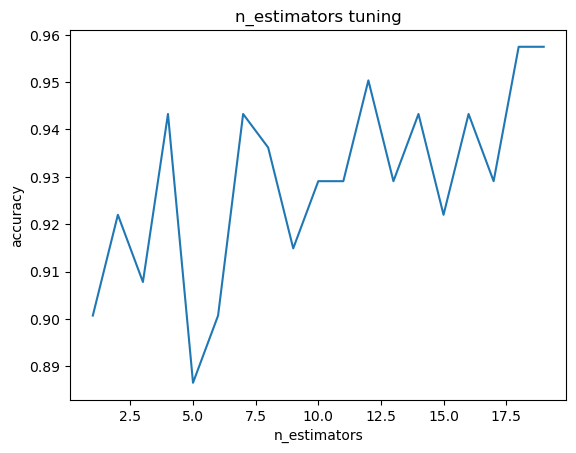

In [307]:
#TUNING OF MAX_DEPTH

X_axis_max_depth = list(range(1, 20))
y_axis_max_depth = []


for k in range(1, 20):
    classifier = RandomForestClassifier(max_depth = k)
    classifier.fit(X_train, y_train)
    y_axis_max_depth.append(classifier.score(X_test, y_test))

plt.plot(X_axis_max_depth, y_axis_max_depth)
plt.title("max_depth tuning")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()

#TUNING OF N_ESTIMATORS

X_axis_n_estimators = list(range(1, 20))
y_axis_n_estimators = []

for k in range(1, 20):
    classifier = RandomForestClassifier(n_estimators = k)
    classifier.fit(X_train, y_train)
    y_axis_n_estimators.append(classifier.score(X_test, y_test))

plt.plot(X_axis_n_estimators, y_axis_n_estimators)
plt.title("n_estimators tuning")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

In [323]:
#FIT MODEL 

classifier = RandomForestClassifier(n_estimators=18, max_depth=9, random_state=42)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)



0.9574468085106383